In [128]:
import pandas as pd
import json

In [129]:
# Namespace(batch_size=128, checkpoint='/checkpoint/vincentqb/checkpoint/checkpoint-27818024-128-.6-.99-13-.8-0.-adadelta-exponential.pth.tar', clip_grad=0.0, dataset='librispeech', decoder='greedy', distributed=False, epochs=200, eps=1e-08, gamma=0.99, jit=False, learning_rate=0.6, momentum=0.8, n_bins=13, optimizer='adadelta', print_freq=10, progress_bar=False, rho=0.95, scheduler='exponential', seed=0, start_epoch=0, weight_decay=1e-05, workers=0, world_size=8)
filename = "/checkpoint/vincentqb/jobs/audio-27817666-1.out"

with open(filename, "r") as f:
    data = f.read()
    
data = data.replace("0: {", "{").replace("'", '"')
data = [json.loads(l) for l in data.splitlines()]
data = pd.DataFrame(data)

data

,group,loss,n,lr,cer,wer,cer over dataset length,wer over dataset length,cer over target length,wer over target length,target length,dataset length
0,train_iteration,19.149326,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,train_iteration,18.041286,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,train_iteration,5.141327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,train_iteration,30.528746,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,train_iteration,14.558473,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44616,train_iteration,0.027564,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44617,train_iteration,0.032508,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44618,train_iteration,0.033625,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44619,train_epoch,0.023257,0,[0.08119980294421923],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# This is the number of iterations for one epoch
data["dataset length"].max()

2688.0

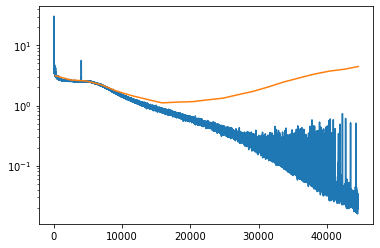

In [131]:
data.loc[data["group"] == "train_iteration", "loss"].plot(logy=True)
data.loc[data["group"] == "validation", "loss"].plot(logy=True)

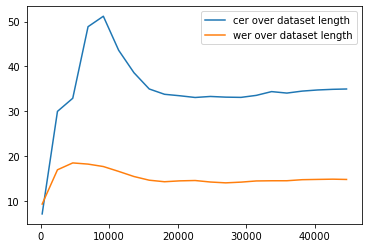

In [132]:
data.loc[data["group"] == "validation", ["cer over dataset length", "wer over dataset length"]].plot()

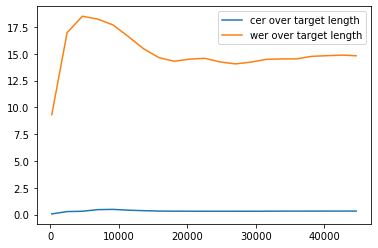

In [133]:
data.loc[data["group"] == "validation", ["cer over target length", "wer over target length"]].plot()